# 1. Get all folder name and details.

In [172]:
import os 
cur_path=os.getcwd()
#print(cur_path)
Execl_path=f"{cur_path}\\..\\..\\Python_SelfProjects\\Database AutoCreation"
Excel_file_dir=os.listdir(path=Execl_path)
Excel_file_dir


['.gitkeep',
 'Income&Expenditure.db',
 'Income&Expenditure.xlsx',
 'IncomeExpenditure - Copy.ipynb',
 'IncomeExpenditure.ipynb']

In [173]:
Execl_path

'c:\\Users\\KIIT\\Desktop\\GitHUB\\CollegeProjects\\InHouse Projects\\ML-DL_SelfProjects\\ML Model Build Automation\\..\\..\\Python_SelfProjects\\Database AutoCreation'

# 2. Read excel and convert to csv

In [174]:
import pandas as pd
Excel_file_data=pd.read_excel(f"{Execl_path}\\Income&Expenditure.xlsx").iloc[:,1:]
Excel_file_data.head()

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,Monday,Income,27700.0,Office,Online,27700.0,27700.0,206620.21
1,2,01-08-2023,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.1,205899.31
2,3,02-08-2023,Wednesday,None,0.0,None,None,26979.1,26979.1,205899.31
3,4,03-08-2023,Thursday,None,0.0,None,None,26979.1,26979.1,205899.31
4,5,04-08-2023,Friday,None,0.0,None,None,26979.1,26979.1,205899.31


In [175]:
Excel_file_data.to_csv("Income&Expenditure.csv")
IncExp_data=pd.read_csv("Income&Expenditure.csv").iloc[:,1:]
IncExp_data.head()

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,Monday,Income,27700.0,Office,Online,27700.0,27700.0,206620.21
1,2,01-08-2023,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.1,205899.31
2,3,02-08-2023,Wednesday,None,0.0,None,None,26979.1,26979.1,205899.31
3,4,03-08-2023,Thursday,None,0.0,None,None,26979.1,26979.1,205899.31
4,5,04-08-2023,Friday,None,0.0,None,None,26979.1,26979.1,205899.31


# 3. Decalare ML Model 

In [176]:
Reg_model_flag=None
if len(IncExp_data.iloc[:,-1].unique())>2:
    print("Regression model to be applied")
    Reg_model_flag="regression"

elif len(IncExp_data.iloc[:,-1].unique())==2:
    print("Classification moddel to be applied")
    Reg_model_flag="classification"
    
else:
    pass

Regression model to be applied


In [177]:
#if Reg_model_flag=="regression":pass elif Reg_model_flag=="classification":pass else: pass

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   
model_linearRegression=LinearRegression()
model_SVRegression=SVR()
model_DTRegression=DecisionTreeRegressor()
model_RFRegression=RandomForestRegressor()
model_regression={"Linear Regression":model_linearRegression,
                  "SVM Regression":model_SVRegression,
                  "DecisionTree Regression":model_DTRegression,
                  "Randomforest Regression":model_RFRegression}

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_logsClassify=LogisticRegression()
model_SVClassify=SVC()
model_DTClassify=DecisionTreeClassifier()
model_RFClassify=RandomForestClassifier()
model_Classify={"Logistic Regression":model_logsClassify,
                "SVM Classification":model_SVClassify,
                "DecisionTree Classification":model_DTClassify,
                "Randomforest Classification":model_RFClassify}

In [179]:
for model_name,model in model_regression.items():
    print(model_name,end=" : ")
    print(model)
print()
for model_name,model in model_Classify.items():
    print(model_name,end=" : ")
    print(model)

Linear Regression : LinearRegression()
SVM Regression : SVR()
DecisionTree Regression : DecisionTreeRegressor()
Randomforest Regression : RandomForestRegressor()

Logistic Regression : LogisticRegression()
SVM Classification : SVC()
DecisionTree Classification : DecisionTreeClassifier()
Randomforest Classification : RandomForestClassifier()


# EDA(Explanatory Data Analysis)

In [180]:
IncExp_data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     2
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

# Data Cleaning - Outliers, Null values

In [181]:
IncExp_data["Pupose of IncExp"].fillna(str(0),inplace=True)
IncExp_data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     0
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

In [182]:
IncExp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    object 
 3   IncExp Status      269 non-null    object 
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   269 non-null    object 
 6   Payment mode       269 non-null    object 
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 21.1+ KB


In [183]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj_col=list(IncExp_data.columns[IncExp_data.dtypes=="object"])[1:]
print(obj_col)
for i in obj_col:
    IncExp_data[i]=le.fit_transform(IncExp_data[i])
IncExp_data

['Day', 'IncExp Status', 'Pupose of IncExp', 'Payment mode']


,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,1,1,27700.0,30,2,27700.0,27700.00,206620.21
1,2,01-08-2023,5,0,720.9,23,2,26979.1,26979.10,205899.31
2,3,02-08-2023,6,2,0.0,29,1,26979.1,26979.10,205899.31
3,4,03-08-2023,4,2,0.0,29,1,26979.1,26979.10,205899.31
4,5,04-08-2023,0,2,0.0,29,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,6,1,27700.0,30,2,27700.0,160080.37,339000.58
265,256,01-02-2024,4,2,0.0,29,1,27700.0,160080.37,339000.58
266,257,02-02-2024,0,2,0.0,29,1,27700.0,160080.37,339000.58
267,258,03-02-2024,2,0,8000.0,0,0,19700.0,152080.37,331000.58


In [184]:
IncExp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    int32  
 3   IncExp Status      269 non-null    int32  
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   269 non-null    int32  
 6   Payment mode       269 non-null    int32  
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int32(4), int64(1), object(1)
memory usage: 16.9+ KB


In [185]:
#IncExp_data["Date"] = pd.to_datetime(IncExp_data["Date"])
#Date=IncExp_data["Date"]
IncExp_data.set_index(IncExp_data["Date"])
#IncExp_data=IncExp_data.drop(columns="Date")
IncExp_data

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,1,1,27700.0,30,2,27700.0,27700.00,206620.21
1,2,01-08-2023,5,0,720.9,23,2,26979.1,26979.10,205899.31
2,3,02-08-2023,6,2,0.0,29,1,26979.1,26979.10,205899.31
3,4,03-08-2023,4,2,0.0,29,1,26979.1,26979.10,205899.31
4,5,04-08-2023,0,2,0.0,29,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,6,1,27700.0,30,2,27700.0,160080.37,339000.58
265,256,01-02-2024,4,2,0.0,29,1,27700.0,160080.37,339000.58
266,257,02-02-2024,0,2,0.0,29,1,27700.0,160080.37,339000.58
267,258,03-02-2024,2,0,8000.0,0,0,19700.0,152080.37,331000.58


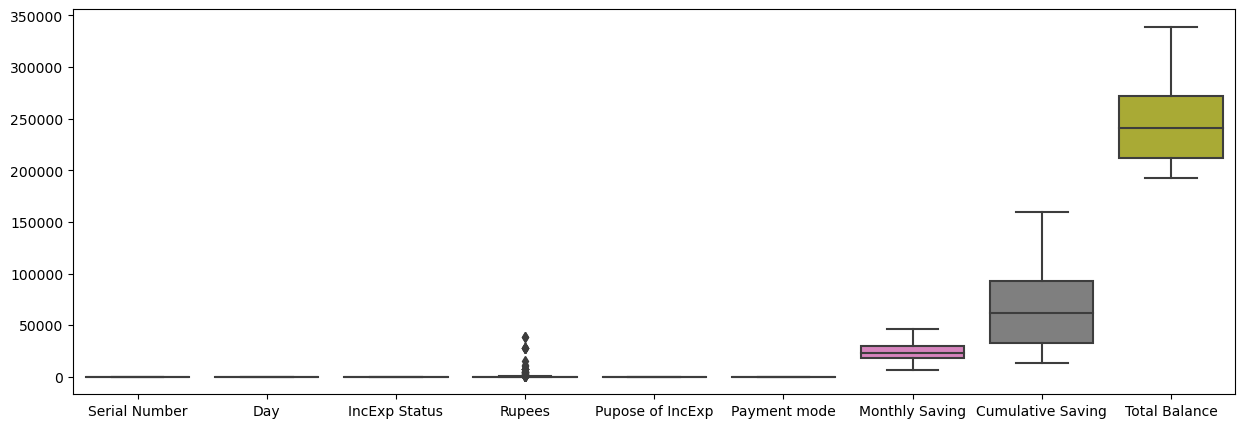

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
sns.boxplot(IncExp_data)
plt.show()

In [187]:
IncExp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    int32  
 3   IncExp Status      269 non-null    int32  
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   269 non-null    int32  
 6   Payment mode       269 non-null    int32  
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int32(4), int64(1), object(1)
memory usage: 16.9+ KB


['Serial Number', 'Date', 'Day', 'IncExp Status', 'Rupees', 'Pupose of IncExp', 'Payment mode', 'Monthly Saving', 'Cumulative Saving', 'Total Balance']


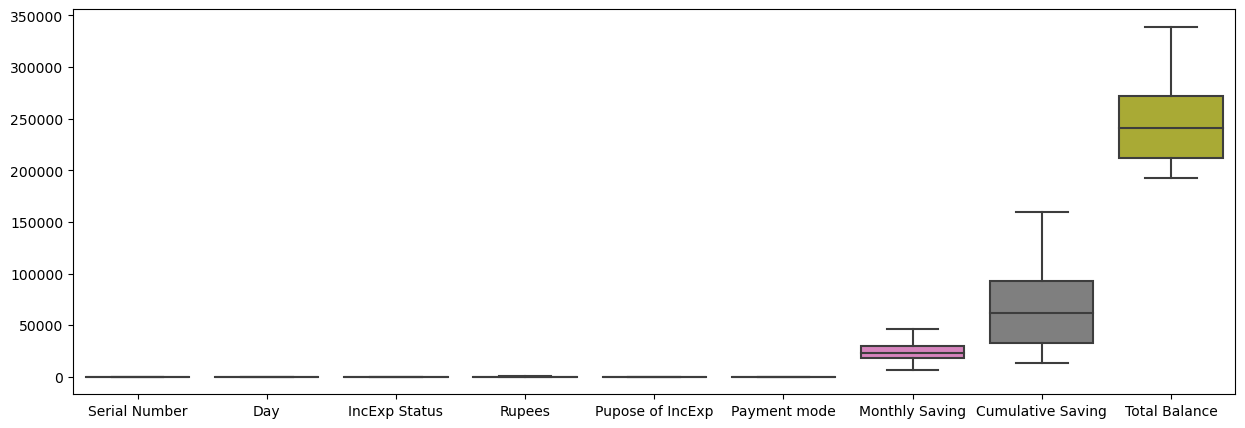

In [188]:
def outlier(i):
    q1=IncExp_data[i].quantile(0.25)
    q3=IncExp_data[i].quantile(0.75)
    IQR=q3-q1

    lb=q1-(IQR*1.5)
    ub=q3+(IQR*1.5)

    IncExp_data.loc[IncExp_data[i]<lb,i]=lb
    IncExp_data.loc[IncExp_data[i]>ub,i]=ub
print(list(IncExp_data.columns))
for i in list(IncExp_data.columns):
    if i!="Date":
        outlier(i)

plt.figure(figsize=[15,5])
sns.boxplot(IncExp_data)
plt.show()

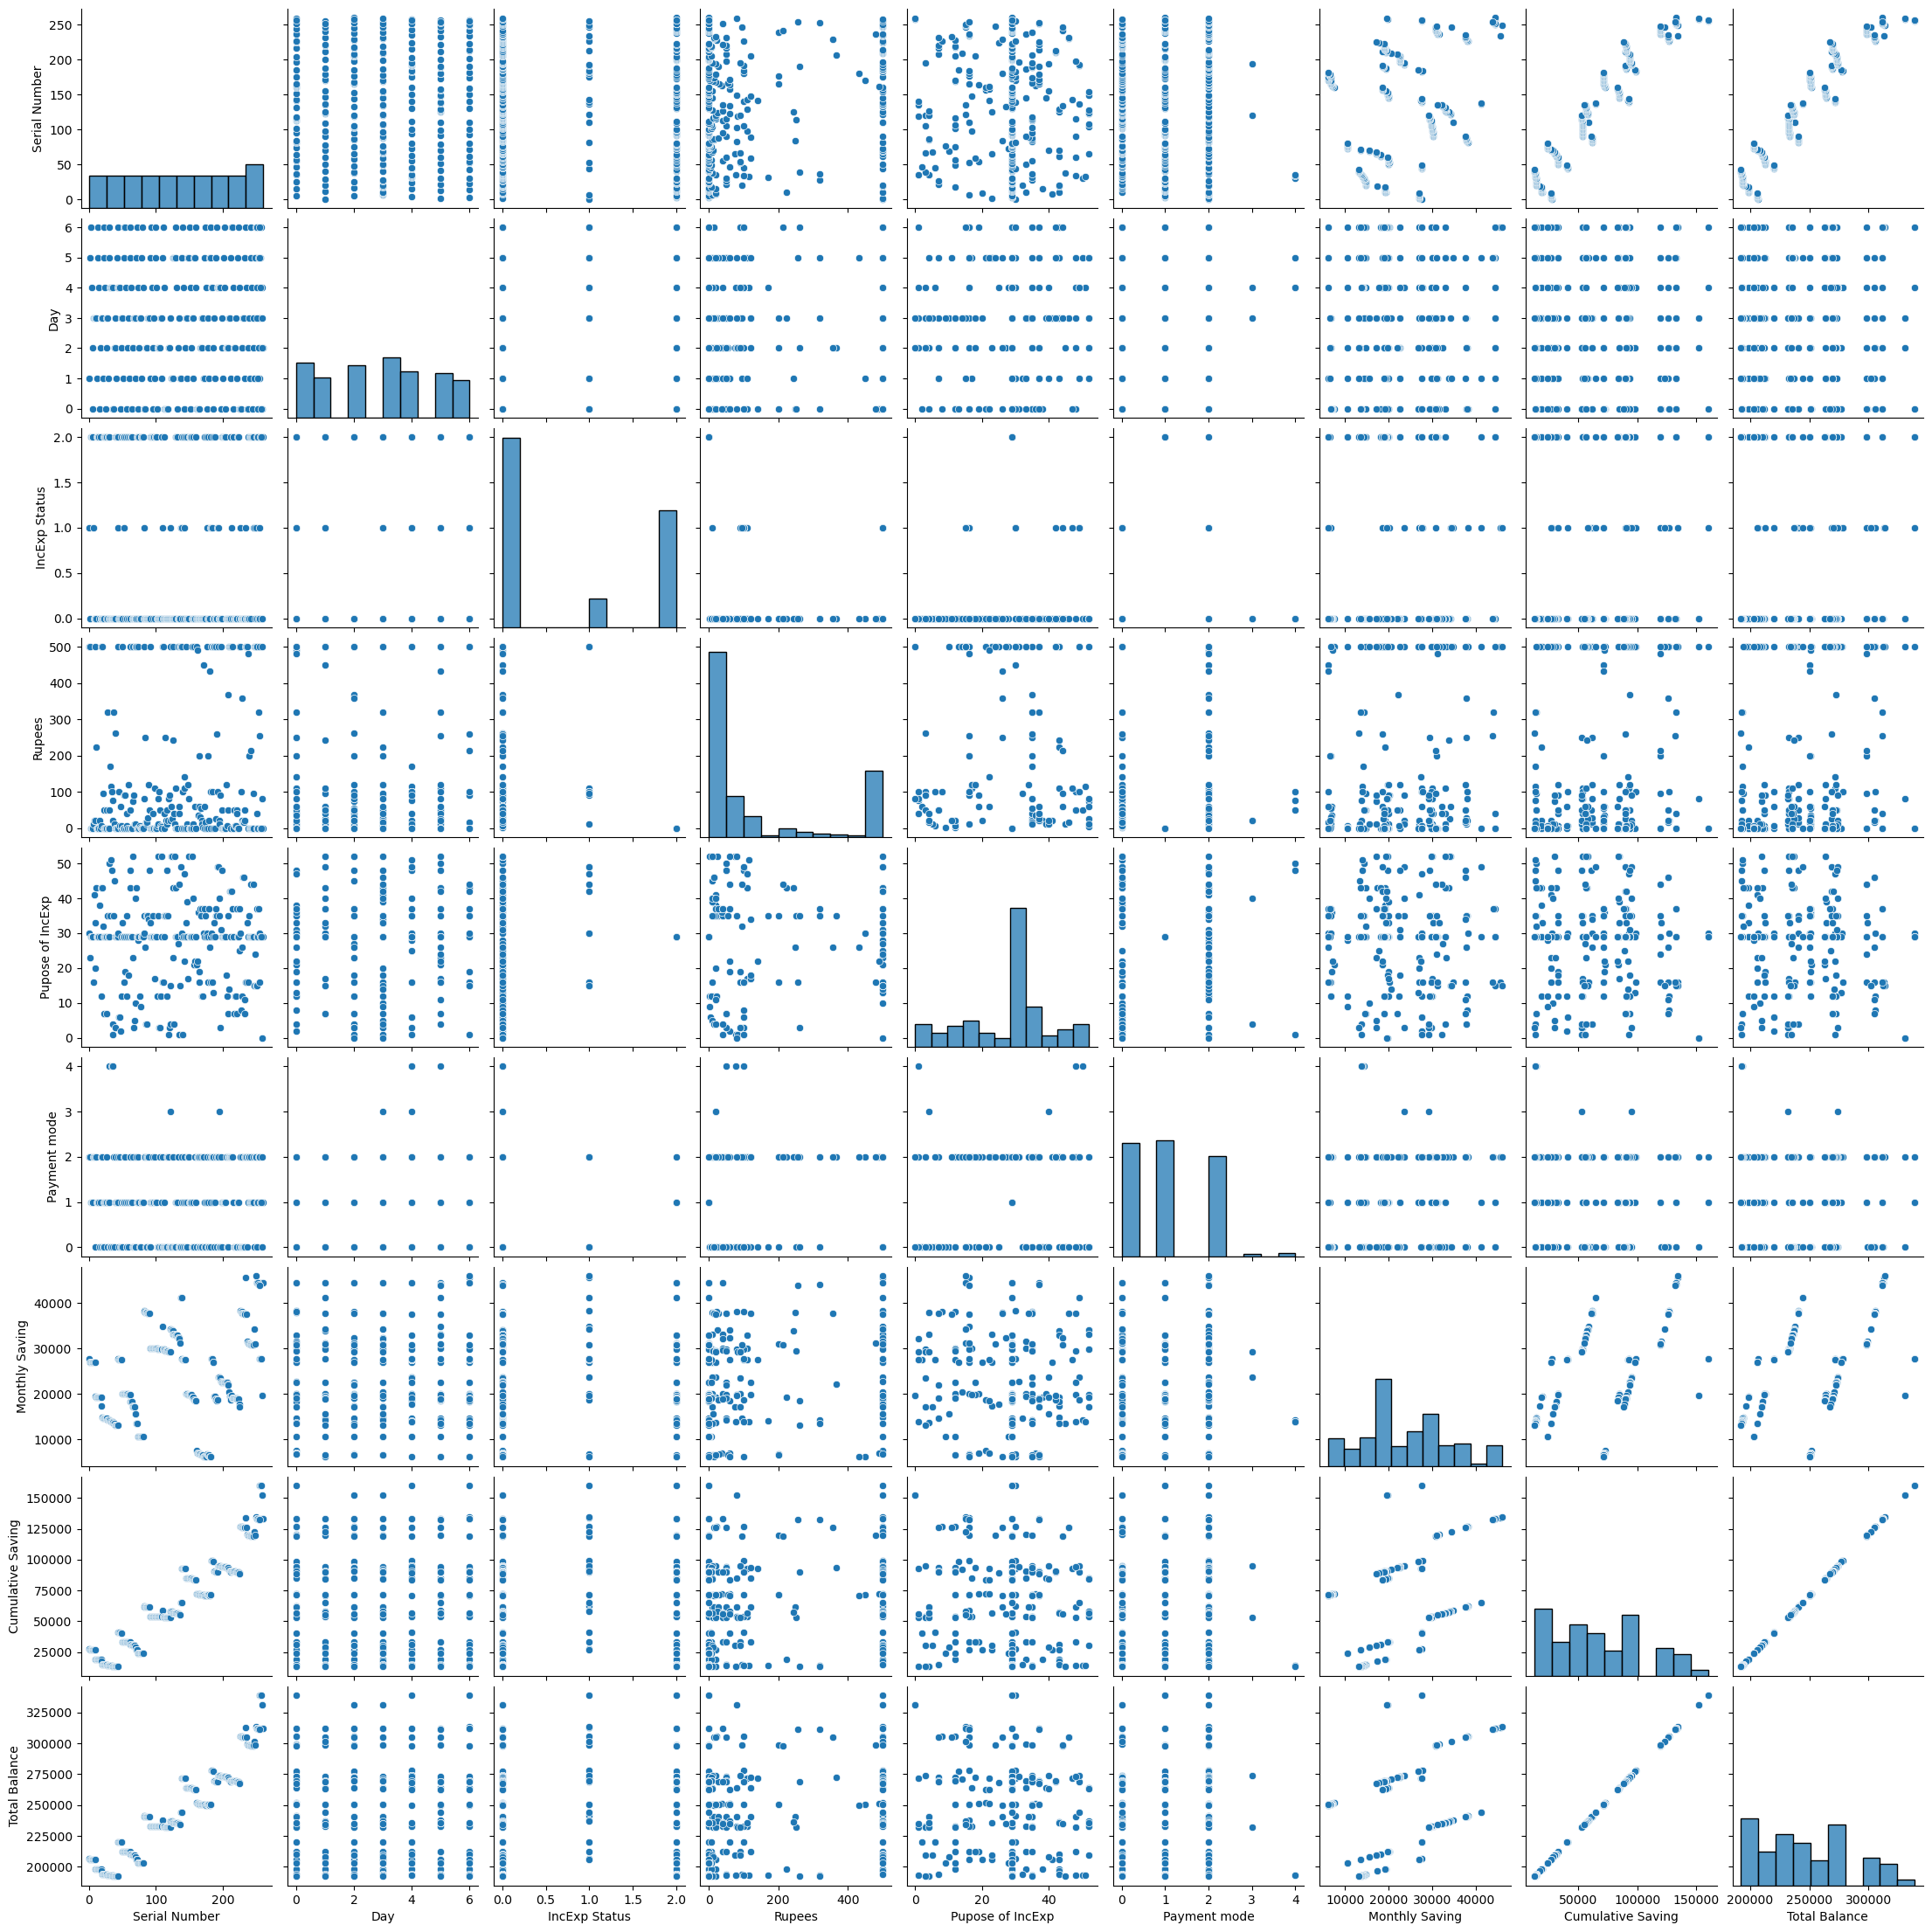

In [189]:
sns.pairplot(IncExp_data)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16580\2572438844.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(IncExp_data.corr(),annot=True)


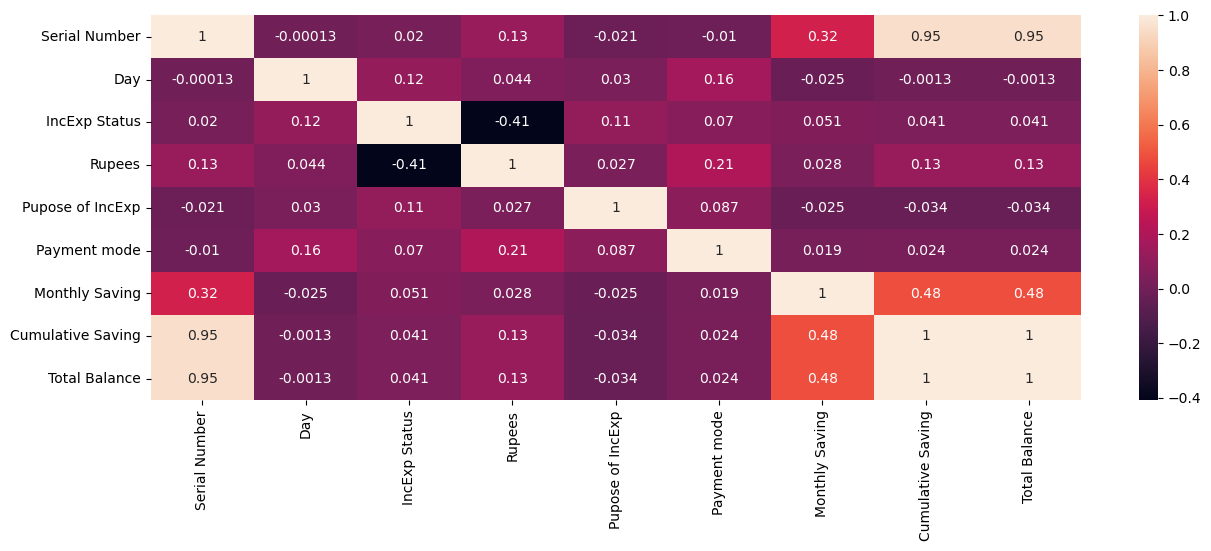

In [190]:
plt.figure(figsize=[15,5])
sns.heatmap(IncExp_data.corr(),annot=True)
plt.show()

In [191]:
x=IncExp_data.iloc[:,:-1].drop(columns=["Date","Cumulative Saving"])
y=IncExp_data.iloc[:,-1]

In [192]:
len(x)

269

In [193]:
len(y)

269

In [194]:
len(IncExp_data)

269

In [195]:
x

,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving
0,1,1.0,1,500.0,30,2,27700.0
1,2,5.0,0,500.0,23,2,26979.1
2,3,6.0,2,0.0,29,1,26979.1
3,4,4.0,2,0.0,29,1,26979.1
4,5,0.0,2,0.0,29,1,26979.1
...,...,...,...,...,...,...,...
264,255,6.0,1,500.0,30,2,27700.0
265,256,4.0,2,0.0,29,1,27700.0
266,257,0.0,2,0.0,29,1,27700.0
267,258,2.0,0,500.0,0,0,19700.0


In [196]:
y

0      206620.21
1      205899.31
2      205899.31
3      205899.31
4      205899.31
         ...    
264    339000.58
265    339000.58
266    339000.58
267    331000.58
268    330920.58
Name: Total Balance, Length: 269, dtype: float64

# Model Building

In [197]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [198]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Linear Regression : LinearRegression()
Training score :  0.9402563362323038
Testing score :  0.9354873039200762
Mean absolute error :  6801.524929190549
Mean squared error :  86975734.53572915
Root mean squared error :  9326.078196955521
R2 score :  0.9354873039200762


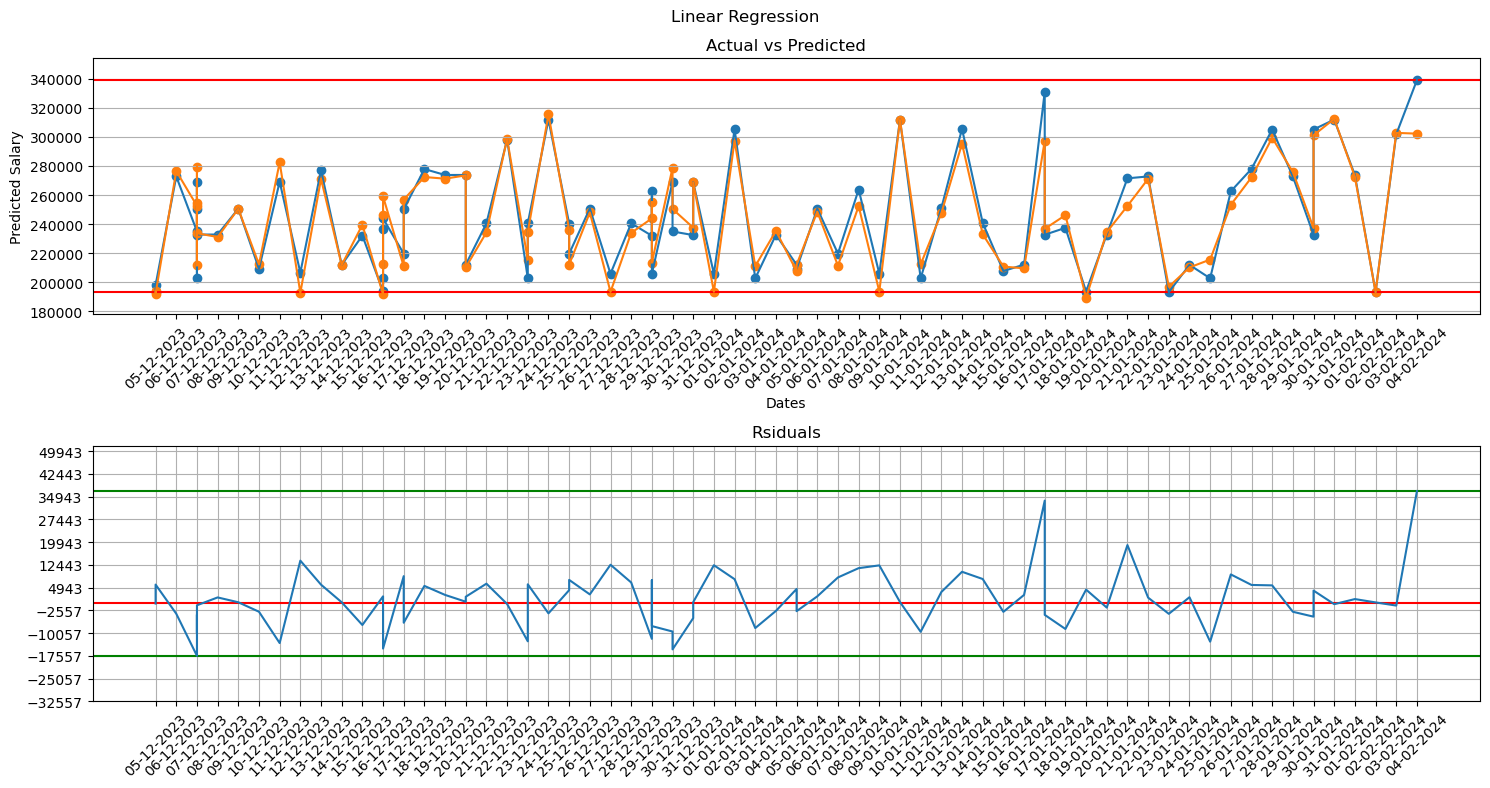

SVM Regression : SVR()
Training score :  -0.0014804358077824542
Testing score :  -0.025084606615145555
Mean absolute error :  31454.97006124128
Mean squared error :  1382014580.6829302
Root mean squared error :  37175.456697704874
R2 score :  -0.025084606615145555


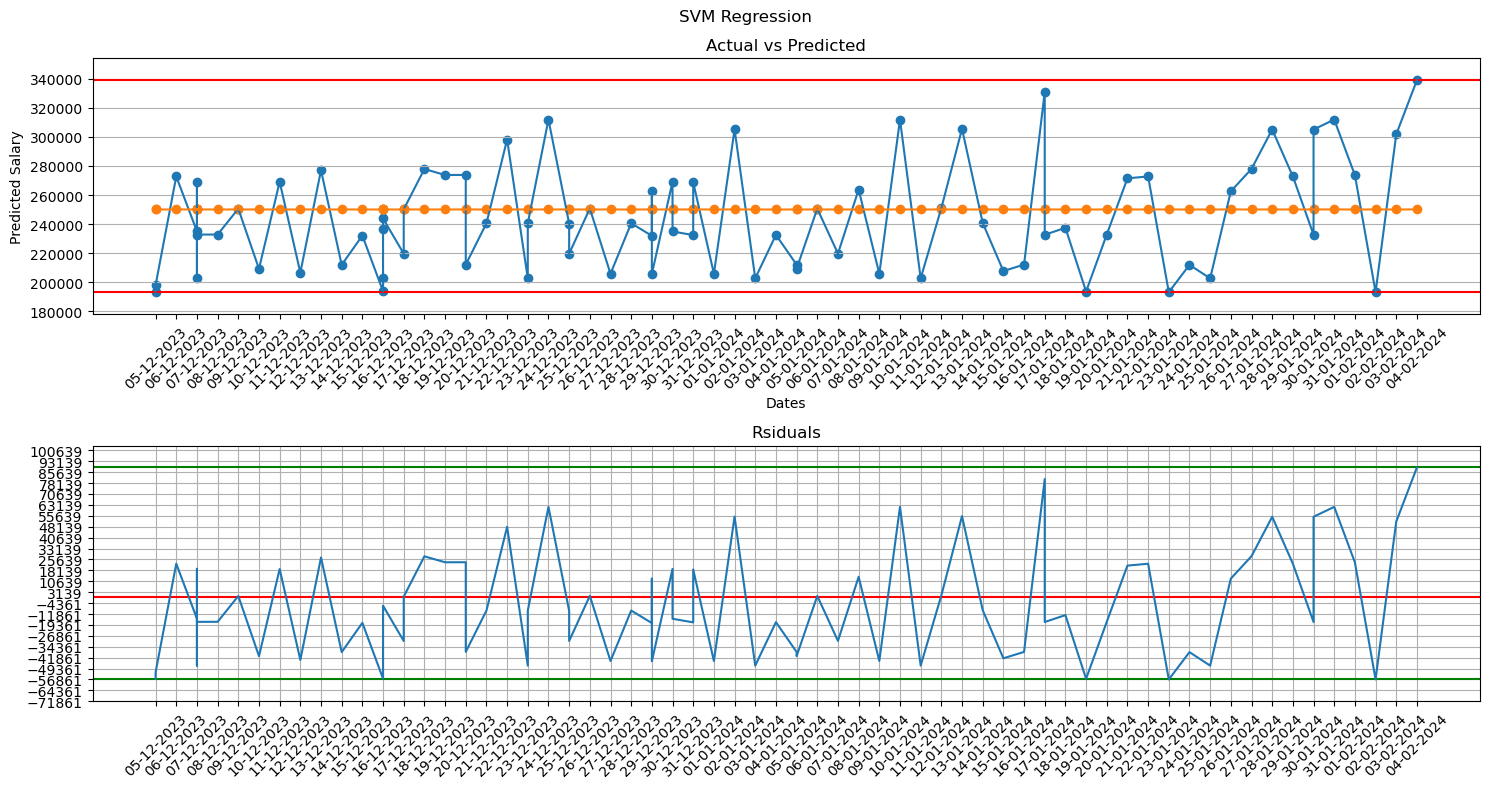

DecisionTree Regression : DecisionTreeRegressor()
Training score :  1.0
Testing score :  0.9969961078047428
Mean absolute error :  623.6067901234575
Mean squared error :  4049834.3120703725
Root mean squared error :  2012.4200138316983
R2 score :  0.9969961078047428


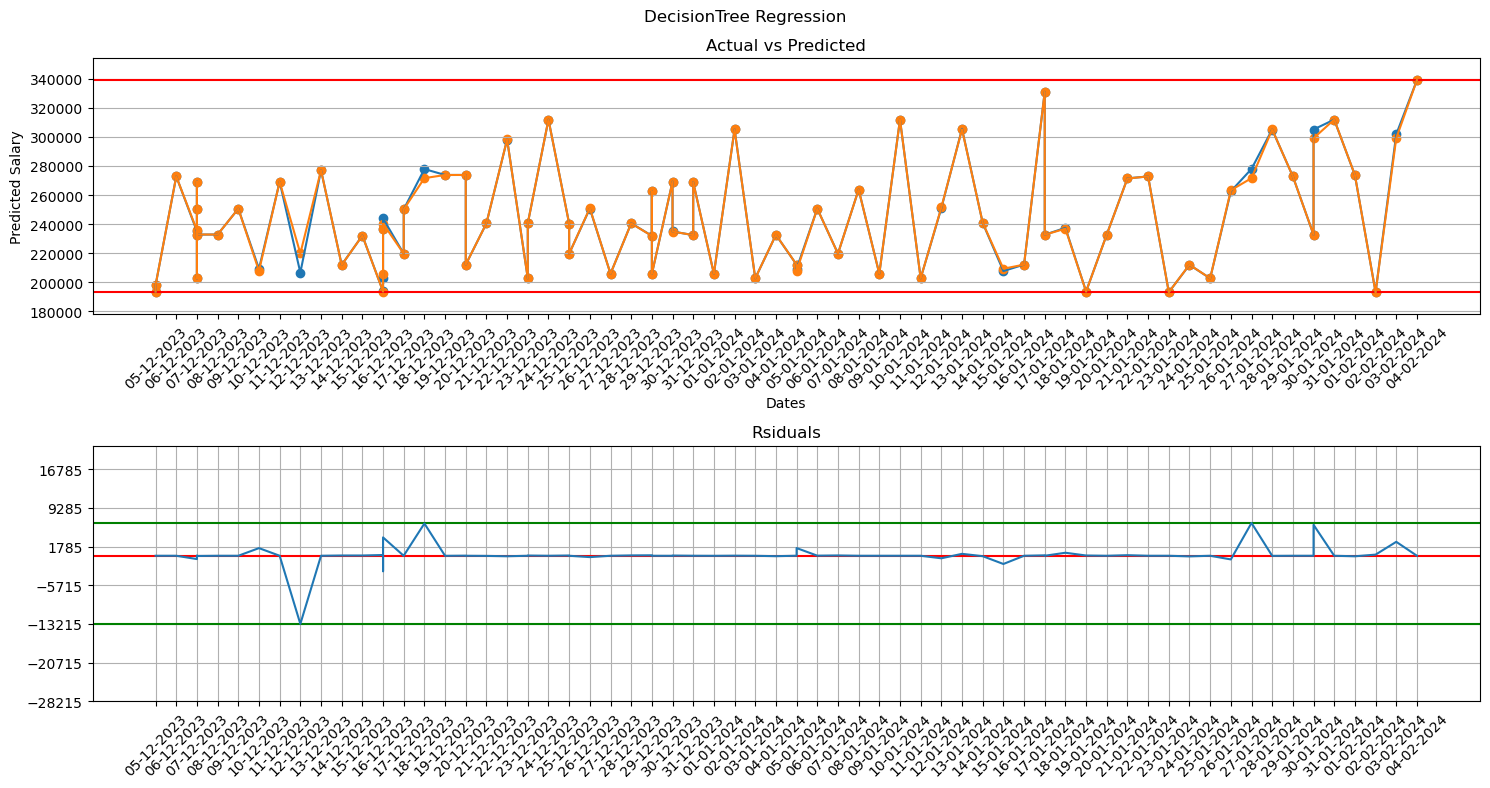

Randomforest Regression : RandomForestRegressor()
Training score :  0.9985644327100224
Testing score :  0.9972589912792319
Mean absolute error :  708.5240395062307
Mean squared error :  3695415.9621896734
Root mean squared error :  1922.3464729828684
R2 score :  0.9972589912792319


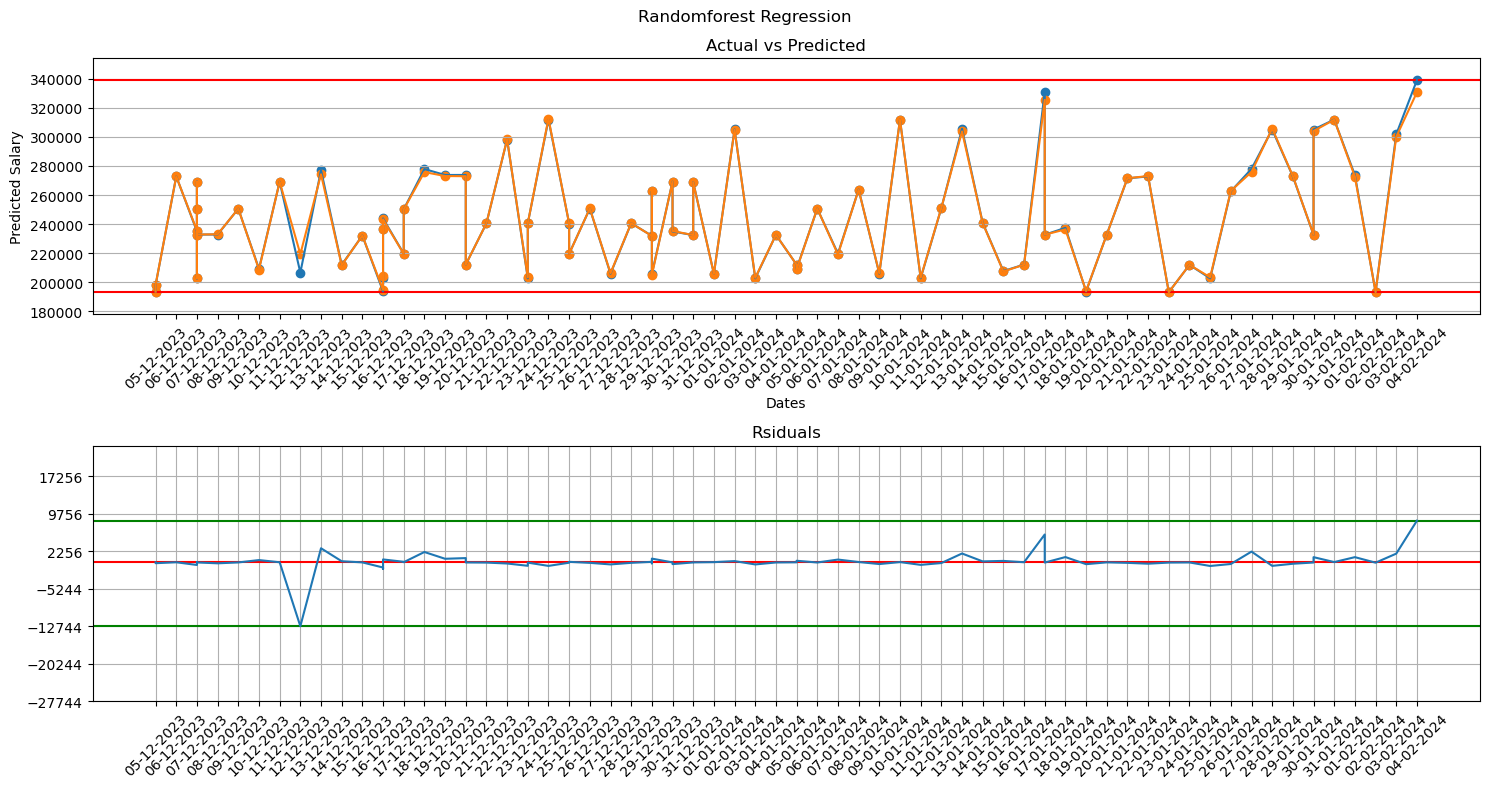

In [249]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,accuracy_score
import numpy as np
plot_step_size=15000
ytick_step_size=7500
if Reg_model_flag=="regression":
    for regression_model_name,regression_model_reference in model_regression.items():
        print(regression_model_name,end=" : ")
        print(regression_model_reference)

        regression_model_reference.fit(x_train,y_train)
        y_pred=regression_model_reference.predict(x_test)
        #print("Linear Regression (predicted values) : ",y_pred)
        print("Training score : ",regression_model_reference.score(x_train,y_train))
        print("Testing score : ",regression_model_reference.score(x_test,y_test))
        print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
        print("Mean squared error : ",mean_squared_error(y_test,y_pred))
        print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
        print("R2 score : ",r2_score(y_test,y_pred))

        #plt.scatter(x_test,y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_pred)

        plt.figure(figsize=[15,8])
        plt.suptitle(f"{regression_model_name}")
        plt.subplot(2,1,1)
        plt.title("Actual vs Predicted")
        plt.xlabel("Dates")
        plt.ylabel("Predicted Salary")
        plt.xticks(rotation=45)
        plt.grid(axis="y")        
        plt.axhline(min(y_test),color="red")
        plt.axhline(max(y_test),color="red")
        plt.ylim([min(y_test)-plot_step_size,max(y_test)+plot_step_size])
        plt.plot(IncExp_data["Date"].iloc[len(IncExp_data)-len(y_test):],y_test)
        plt.scatter(IncExp_data["Date"].iloc[len(IncExp_data)-len(y_test):],y_test)
        plt.scatter(IncExp_data["Date"].iloc[len(IncExp_data)-len(y_test):],y_pred)
        plt.plot(IncExp_data["Date"].iloc[len(IncExp_data)-len(y_test):],y_pred)
        #plt.show()

        #plt.figure(figsize=[15,5])
        plt.subplot(2,1,2)
        plt.xticks(rotation=45)
        plt.axhline(max(y_test-y_pred),color="green")
        plt.axhline(0,color="red")
        plt.axhline(min(y_test-y_pred),color="green")
        plt.ylim(min(y_test-y_pred)-plot_step_size,max(y_test-y_pred)+plot_step_size)
        y_min, y_max = min(y_test-y_pred) - plot_step_size, max(y_test-y_pred) + plot_step_size
        plt.yticks(np.arange(y_min, y_max, ytick_step_size))  # Set stepping for y-axis
        plt.title(f"Rsiduals")
        plt.grid(axis='x')
        plt.grid(axis='y')        
        plt.plot(IncExp_data["Date"].iloc[len(IncExp_data)-len(y_test):],y_test-y_pred)
        plt.tight_layout()
        plt.show() 


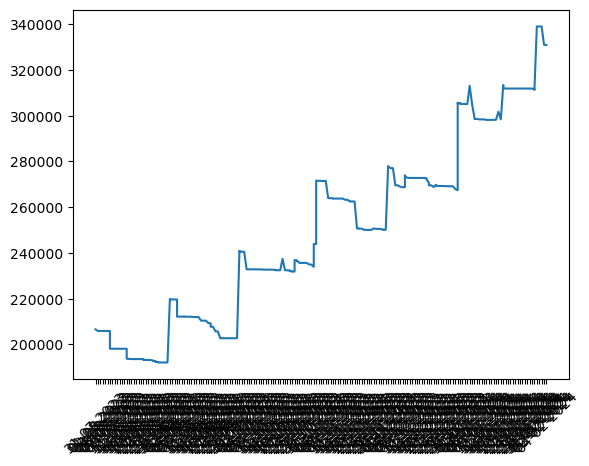

In [227]:
plt.plot(IncExp_data["Date"],IncExp_data.iloc[:,-1])
plt.xticks(rotation=45)
plt.show()

In [201]:
for i,j in zip(y_test,y_pred):
    print(f"{i}   -   {j}=       {i-j}")

193629.31   -   193577.65999999997=       51.65000000002328
198146.61   -   198145.2899999997=       1.3200000002980232
272794.33   -   272773.3199999993=       21.010000000707805
235020.33   -   235542.24700000003=       -521.9170000000449
202728.01   -   202893.75250000015=       -165.74250000013853
250531.33   -   250542.85999999943=       -11.529999999445863
269299.38   -   269288.1649999998=       11.215000000200234
232821.07   -   232814.5100000002=       6.559999999793945
232861.07   -   233283.05580000012=       -421.98580000011134
250606.33   -   250614.66999999943=       -8.339999999443535
209244.66   -   208860.50350000008=       384.15649999992456
269145.38   -   269827.0199999998=       -681.6399999997811
206620.21   -   218952.5999999998=       -12332.38999999981
277078.33   -   274296.8299999993=       2781.5000000006985
211998.31   -   211935.2244999999=       63.08550000010291
232145.07   -   232127.17000000022=       17.899999999790452
193774.31   -   194592.624000000